<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ingcarlosleon/blob/main/actividad-semana-7/modulo_4_desarrollo_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gestión de Datos

## Objetivos

*   Manejar valores faltantes
*   Formato de datos correcto
*   Estandarizar y normalizar datos

## Tabla de contenido
* Identificar y manejar los valores faltantes
  * Identificar valores faltantes
  * Tratar con valores faltantes
  * Formato de datos correcto
* Estandarización de datos
* Normalización de datos (centrado/escalado)
* Agrupación
* Variable indicadora

## ¿Cuál es el propósito de la disputa de datos?

La disputa de datos es el proceso de convertir datos del formato inicial a un formato que puede ser mejor para el análisis.

### ¿Cuál es la tasa de consumo de combustible (L/100k) para el automóvil diésel?

### Datos de importacion

Puede encontrar el "Conjunto de datos de automóviles" en el siguiente enlace: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data . Utilizaremos este conjunto de datos a lo largo de este curso.

<h4>Import pandas</h4> 


In [225]:
import pandas as pd
import matplotlib.pylab as plt

In [226]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [227]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Utilice el método read_csv() de Pandas para cargar los datos desde la dirección web. Establezca el parámetro "nombres" igual a los "encabezados" de la lista de Python.

In [228]:

df = pd.read_csv(filename, names = headers)

In [229]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Como podemos ver, aparecieron varios signos de interrogación en el marco de datos; esos son valores faltantes que pueden dificultar nuestro análisis posterior.

Entonces, ¿cómo identificamos todos esos valores faltantes y los tratamos?

**¿Cómo trabajar con datos faltantes?**

Pasos para trabajar con datos faltantes:

1. Identificar datos faltantes
2. Tratar con datos faltantes
3. Formato de datos correcto

## Identificar y manejar los valores faltantes
### Identificar valores faltantes
#### Convertir "?" a NaN

En el conjunto de datos del automóvil, los datos faltantes vienen con el signo de interrogación "?". Reemplazamos "?" con NaN (No es un número), el marcador de valor faltante predeterminado de Python por razones de conveniencia y velocidad computacional. Aquí usamos la función:

In [230]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Evaluación de datos faltantes
Los valores que faltan se convierten de forma predeterminada. Usamos las siguientes funciones para identificar estos valores faltantes

In [231]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Cuente los valores faltantes en cada columna

Usando un bucle for en Python, podemos calcular rápidamente la cantidad de valores que faltan en cada columna. Como se mencionó anteriormente, "Verdadero" representa un valor faltante y "Falso" significa que el valor está presente en el conjunto de datos. En el cuerpo del bucle for, el método ".value_counts()" cuenta el número de valores "Verdaderos".

In [232]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

#### Calcule el valor medio de la columna "pérdidas normalizadas"

In [233]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


#### Reemplace "NaN" con el valor medio en la columna "pérdidas normalizadas"

In [234]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

Calcule el valor medio para la columna "diámetro"


In [235]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


Reemplace "NaN" con el valor medio en la columna "bore"->"diámetro

In [236]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

# Pregunta 1:
Según el ejemplo anterior, reemplace NaN en la columna "carrera" con el valor medio.

In [237]:
# Write your code below and press Shift+Enter to execute 
# Calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

Average of stroke: 3.255422885572139


#### Calcule el valor medio para la columna "caballos de fuerza"


In [238]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


Reemplace "NaN" con el valor medio en la columna "caballos de fuerza"

In [239]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Calcule el valor medio para la columna "peak-rpm"

In [240]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


#### Reemplace "NaN" con el valor medio en la columna "peak-rpm"

In [241]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Para ver qué valores están presentes en una columna en particular, podemos usar el método ".value_counts()":

In [242]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Podemos ver que cuatro puertas son el tipo más común. También podemos usar el método ".idxmax()" para calcular automáticamente el tipo más común:

In [243]:
df['num-of-doors'].value_counts().idxmax()

'four'

El procedimiento de sustitución es muy similar al que hemos visto anteriormente:

In [244]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Finalmente, eliminemos todas las filas que no tienen datos de precios:

In [245]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [246]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Hagamos una lista de los tipos de datos para cada columna.


In [247]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Como podemos ver arriba, algunas columnas no son del tipo de datos correcto. Las variables numéricas deben tener el tipo 'flotante' o 'int', y las variables con cadenas, como las categorías, deben tener el tipo 'objeto'. Por ejemplo, las variables 'diámetro interior' y 'carrera' son valores numéricos que describen los motores, por lo que deberíamos esperar que sean del tipo 'flotante' o 'int'; sin embargo, se muestran como tipo 'objeto'. Tenemos que convertir los tipos de datos a un formato adecuado para cada columna usando el método "astype()".

Convertir tipos de datos al formato adecuado


In [248]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

#### Hagamos una lista de las columnas después de la conversión.

In [249]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

¡Maravilloso!

Ahora finalmente hemos obtenido el conjunto de datos limpio sin valores faltantes con todos los datos en su formato adecuado.

## Estandarización de datos

Los datos generalmente se recopilan de diferentes agencias en diferentes formatos. (La estandarización de datos también es un término para un tipo particular de normalización de datos donde restamos la media y dividimos por la desviación estándar).

¿Qué es la estandarización?

La estandarización es el proceso de transformar los datos en un formato común, lo que permite al investigador hacer una comparación significativa.

Ejemplo

Transformar mpg a L/100km:

En nuestro conjunto de datos, las columnas de consumo de combustible "city-mpg" y "highway-mpg" están representadas por unidades de mpg (millas por galón). Supongamos que estamos desarrollando una aplicación en un país que acepta el consumo de combustible con el estándar L/100km.

Tendremos que aplicar la transformación de datos para transformar mpg en L/100km.

La fórmula para la conversión de unidades es:

L/100km = 235 / millas por galón

Podemos hacer muchas operaciones matemáticas directamente en Pandas.

In [250]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [251]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


##Pregunta 2:

De acuerdo con el ejemplo anterior, transforme mpg a L/100km en la columna "highway-mpg" y cambie el nombre de la columna a "highway-L/100km".

In [252]:
# Write your code below and press Shift+Enter to execute 
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


### Normalización de datos
¿Por qué normalización?

La normalización es el proceso de transformar valores de varias variables en un rango similar. Las normalizaciones típicas incluyen escalar la variable para que el promedio de la variable sea 0, escalar la variable para que la varianza sea 1 o escalar la variable para que los valores de la variable oscilen entre 0 y 1.

Ejemplo

Para demostrar la normalización, digamos que queremos escalar las columnas "largo", "ancho" y "alto".

Objetivo: quisiera normalizar esas variables para que su valor oscile entre 0 y 1

Enfoque: reemplazar el valor original por (valor original)/(valor máximo)

In [253]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

### Pregunta 3:

De acuerdo con el ejemplo anterior, normalice la columna "altura".

In [254]:
# Write your code below and press Shift+Enter to execute 
df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Aquí podemos ver que hemos normalizado "largo", "ancho" y "alto" en el rango de [0,1].

##Agrupación

¿Por qué agrupar?

El agrupamiento es un proceso de transformación de variables numéricas continuas en 'contenedores' categóricos discretos para el análisis agrupado.

Ejemplo:

En nuestro conjunto de datos, "caballos de fuerza" es una variable de valor real que va de 48 a 288 y tiene 59 valores únicos. ¿Qué pasa si solo nos preocupamos por la diferencia de precio entre autos de alta potencia, potencia media y poca potencia (3 tipos)? ¿Podemos reorganizarlos en tres "contenedores" para simplificar el análisis?

Usaremos el método de pandas 'cortar' para segmentar la columna 'caballos de fuerza' en 3 contenedores.

### Ejemplo de agrupamiento de datos en Pandas
Convierta los datos al formato correcto:

In [255]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Tracemos el histograma de caballos de fuerza para ver cómo se ve la distribución de caballos de fuerza.

Text(0.5, 1.0, 'horsepower bins')

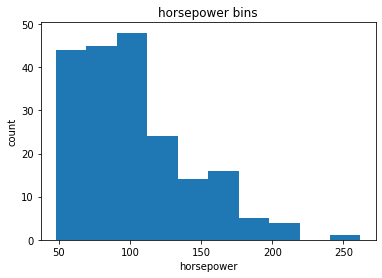

In [256]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Nos gustaría 3 contenedores de ancho de banda del mismo tamaño, por lo que usamos la linspace(start_value, end_value, numbers_generatedfunción numpy.

Como queremos incluir el valor mínimo de caballos de fuerza, queremos establecer start_value = min(df["caballos de fuerza"]).

Como queremos incluir el valor máximo de caballos de fuerza, queremos establecer end_value = max(df["caballos de fuerza"]).

Dado que estamos construyendo 3 contenedores de igual longitud, debe haber 4 divisores, por lo que los números_generados = 4.

Construimos una matriz bin con un valor mínimo a un valor máximo utilizando el ancho de banda calculado anteriormente. Los valores determinarán cuándo termina un contenedor y comienza otro.

In [257]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Establecemos nombres de grupo:

In [258]:
group_names = ['Low', 'Medium', 'High']

Aplicamos la función "cortar" para determinar a qué df['horsepower']pertenece cada valor de.

In [259]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Veamos el número de vehículos en cada bin:

In [260]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Tracemos la distribución de cada contenedor:

Text(0.5, 1.0, 'horsepower bins')

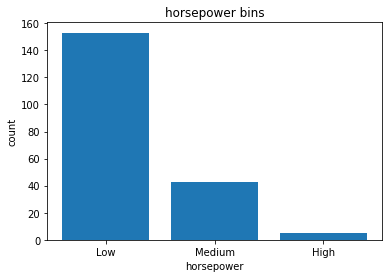

In [261]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Mire el marco de datos de arriba con cuidado. Encontrará que la última columna proporciona los contenedores para "caballos de fuerza" basados ​​en 3 categorías ("Bajo", "Medio" y "Alto").

¡Reducimos con éxito los intervalos de 59 a 3!

### Visualización de contenedores
Normalmente, se usa un histograma para visualizar la distribución de los contenedores que creamos anteriormente.

Text(0.5, 1.0, 'horsepower bins')

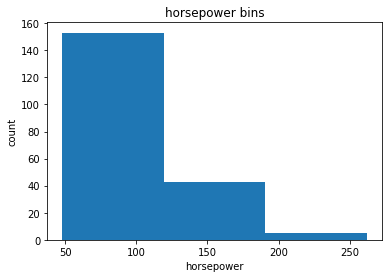

In [262]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

El gráfico anterior muestra el resultado de clasificación para el atributo "caballos de fuerza".

#### Variable indicadora (o variable ficticia)

¿Qué es una variable indicadora?

Una variable indicadora (o variable ficticia) es una variable numérica utilizada para etiquetar categorías. Se les llama 'tontos' porque los números en sí mismos no tienen un significado inherente.

¿Por qué usamos variables indicadoras?

Usamos variables indicadoras para poder usar variables categóricas para el análisis de regresión en los módulos posteriores.

Ejemplo

Vemos que la columna "tipo de combustible" tiene dos valores únicos: "gas" o "diésel". La regresión no entiende de palabras, sólo de números. Para usar este atributo en el análisis de regresión, convertimos "tipo de combustible" en variables indicadoras.

Usaremos el método de pandas 'get_dummies' para asignar valores numéricos a diferentes categorías de tipo de combustible.

In [263]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

Obtenga las variables del indicador y asígnelas al marco de datos "dummy_variable_1":

In [264]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Cambie los nombres de las columnas para mayor claridad:

In [265]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


En el marco de datos, la columna 'tipo de combustible' tiene valores para 'gasolina' y 'diésel' como 0 y 1 ahora.

In [266]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [267]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


Las dos últimas columnas son ahora la representación de la variable indicadora de la variable tipo de combustible. Todos son 0 y 1 ahora.

# Pregunta #4:
Similar a antes, cree una variable indicadora para la columna "aspiración"

In [268]:
# Write your code below and press Shift+Enter to execute 
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()


,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


# Pregunta #5:
Combine el nuevo marco de datos con el marco de datos original, luego suelte la columna 'aspiración'.

In [269]:
# Write your code below and press Shift+Enter to execute 
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)


# Análisis de datos con Python

Objetivo
* Explorar las característicaspara predecir el precio del automóvil

## Tabla de contenido
* Importar datos del módulo
* Análisis de patrones de características individuales mediante visualización
* Análisis Estadístico Descriptivo
* Conceptos básicos de agrupación
* Correlación y causalidad
* ANOVA

### ¿Cuáles son las principales características que más inciden en el precio del coche?

## 1. Importar datos del Módulo 2


In [270]:
import pandas as pd
import numpy as np

In [271]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [272]:

df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 2. Análisis de patrones de características individuales mediante visualización

Para instalar Seaborn usamos pip, el administrador de paquetes de Python.

Importe los paquetes de visualización "Matplotlib" y "Seaborn". No se olvide de "% matplotlib inline" para trazar en un cuaderno Jupyter.

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### ¿Cómo elegir el método de visualización adecuado?

Al visualizar variables individuales, es importante comprender primero con qué tipo de variable se está tratando. Esto nos ayudará a encontrar el método de visualización adecuado para esa variable.

In [274]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


# Pregunta 1:

¿Cuál es el tipo de datos de la columna "peak-rpm"?

In [275]:
# Write your code below and press Shift+Enter to execute 
df['peak-rpm'].dtypes

dtype('float64')

Por ejemplo, podemos calcular la correlación entre variables de tipo "int64" o "float64" usando el método "corr":

In [276]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


## Variables numéricas continuas:

Las variables numéricas continuas son variables que pueden contener cualquier valor dentro de algún rango. Pueden ser del tipo "int64" o "float64". Una excelente manera de visualizar estas variables es mediante diagramas de dispersión con líneas ajustadas.

Para comenzar a comprender la relación (lineal) entre una variable individual y el precio, podemos usar "regplot" que traza el diagrama de dispersión más la línea de regresión ajustada para los datos.

Veamos varios ejemplos de diferentes relaciones lineales:

### Relación lineal positiva

Encontremos el diagrama de dispersión de "tamaño del motor" y "precio".

(0.0, 53450.913678900644)

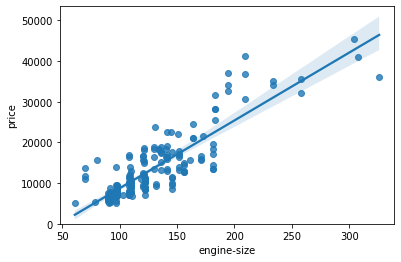

In [277]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

A medida que aumenta el tamaño del motor, aumenta el precio: esto indica una correlación directa positiva entre estas dos variables. El tamaño del motor parece un indicador bastante bueno del precio, ya que la línea de regresión es casi una línea diagonal perfecta.

Podemos examinar la correlación entre 'tamaño del motor' y 'precio' y ver que es aproximadamente 0,87.

In [278]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


El mpg en carretera es una variable predictiva potencial del precio. Encontremos el diagrama de dispersión de "mpg en carretera" y "precio".

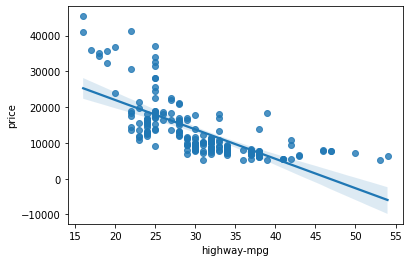

In [279]:
sns.regplot(x="highway-mpg", y="price", data=df)

# Desarrollo de Modelos
## Objectives
*   Desarrollar modelos de predicción

En esta sección, desarrollaremos varios modelos que predecirán el precio del automóvil utilizando las variables o características. Esto es solo una estimación, pero debería darnos una idea objetiva de cuánto debería costar el automóvil.

Algunas preguntas que queremos hacer en este módulo

¿Sé si el distribuidor está ofreciendo un valor justo por mi intercambio?
¿Sé si le puse un valor justo a mi auto?
En el análisis de datos, a menudo usamos el desarrollo de modelos para ayudarnos a predecir futuras observaciones a partir de los datos que tenemos.

Un modelo nos ayudará a comprender la relación exacta entre diferentes variables y cómo se utilizan estas variables para predecir el resultado.

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [281]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [282]:

df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Regresión lineal y regresión lineal múltiple

Regresión lineal

Un ejemplo de un modelo de datos que usaremos es:

**Regresión lineal simple**
La regresión lineal simple es un método que nos ayuda a comprender la relación entre dos variables:

El predictor/variable independiente (X)
La respuesta/variable dependiente (que queremos predecir)(Y)
El resultado de la regresión lineal es una función lineal que predice la variable de respuesta (dependiente) en función de la variable predictora (independiente).

$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$


<b>Linear Function</b>
$$
Yhat = a + b  X
$$


* a se refiere a la intersección de la línea de regresión, en otras palabras: el valor de Y cuando X es 0
* b se refiere a la pendiente de la línea de regresión, en otras palabras: el valor con el que cambia Y cuando X aumenta en 1 unidad

##### Carguemos los módulos para la regresión lineal:


In [283]:
from sklearn.linear_model import LinearRegression

Cree el objeto de regresión lineal:


In [284]:
lm = LinearRegression()
lm

LinearRegression()

#### ¿Cómo podría "autopista-mpg" ayudarnos a predecir el precio del automóvil?

Para este ejemplo, queremos ver cómo Highway-mpg puede ayudarnos a predecir el precio del automóvil. Usando una regresión lineal simple, crearemos una función lineal con "mpg en carretera" como la variable predictora y el "precio" como la variable de respuesta.

In [285]:
X = df[['highway-mpg']]
Y = df['price']

Ajuste el modelo lineal usando Highway-mpg:


In [286]:
lm.fit(X,Y)

LinearRegression()

Podemos generar una predicción:

In [287]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

#### ¿Cuál es el valor del intercepto (a)?


In [288]:
lm.intercept_

38423.3058581574

##### ¿Cuál es el valor de la pendiente (b)?


In [289]:
lm.coef_

array([-821.73337832])

### ¿Cuál es el modelo lineal estimado final que obtenemos?
Como vimos arriba, deberíamos obtener un modelo lineal final con la estructura:


$$
Yhat = a + b  X
$$


Conectando los valores reales obtenemos:


Precio = 38423.31 - 821.73 x mpg en carretera


#### Regresión lineal múltiple
¿Qué pasa si queremos predecir el precio del automóvil usando más de una variable?

Si queremos usar más variables en nuestro modelo para predecir el precio del automóvil, podemos usar la regresión lineal múltiple . La regresión lineal múltiple es muy similar a la regresión lineal simple, pero este método se utiliza para explicar la relación entre una variable de respuesta continua (dependiente) y dos o más variables predictoras (independientes). La mayoría de los modelos de regresión del mundo real involucran múltiples predictores. Ilustraremos la estructura usando cuatro variables predictoras, pero estos resultados pueden generalizarse a cualquier número entero:

$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$


La ecuación está dada por:


$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


Del apartado anterior sabemos que otros buenos predictores de precio podrían ser:
* Horsepower
* Curb-weight
* Engine-size
* Highway-mpg

Desarrollemos un modelo usando estas variables como variables predictoras.

In [290]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Ajuste el modelo lineal utilizando las cuatro variables mencionadas anteriormente.

In [291]:
lm.fit(Z, df['price'])

LinearRegression()

¿Cuál es el valor del intercepto(a)?


In [292]:
lm.intercept_

-15806.62462632922

¿Cuáles son los valores de los coeficientes (b1, b2, b3, b4)?

In [293]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

¿Cuál es el modelo lineal estimado final que obtenemos?

Como vimos arriba, deberíamos obtener una función lineal final con la estructura:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

¿Cuál es la función lineal que obtenemos en este ejemplo?

Precio = -15678,742628061467 + 52,65851272 x caballos de fuerza + 4,69878948 x peso en vacío + 81,95906216 x tamaño del motor + 33,58258185 x mpg en carretera

## 2. Evaluación del modelo mediante visualización
Ahora que hemos desarrollado algunos modelos, ¿cómo evaluamos nuestros modelos y elegimos el mejor? Una forma de hacerlo es usando una visualización.

Importe el paquete de visualización, seaborn:

In [294]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

### Gráfico de regresión
Cuando se trata de regresión lineal simple, una excelente manera de visualizar el ajuste de nuestro modelo es mediante gráficos de regresión .

Este gráfico mostrará una combinación de puntos de datos dispersos (un gráfico de dispersión ), así como la línea de regresión lineal ajustada que atraviesa los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación, así como la dirección (correlación positiva o negativa).

Visualicemos el mpg en carretera como una posible variable predictora del precio:

(0.0, 48172.233019018895)

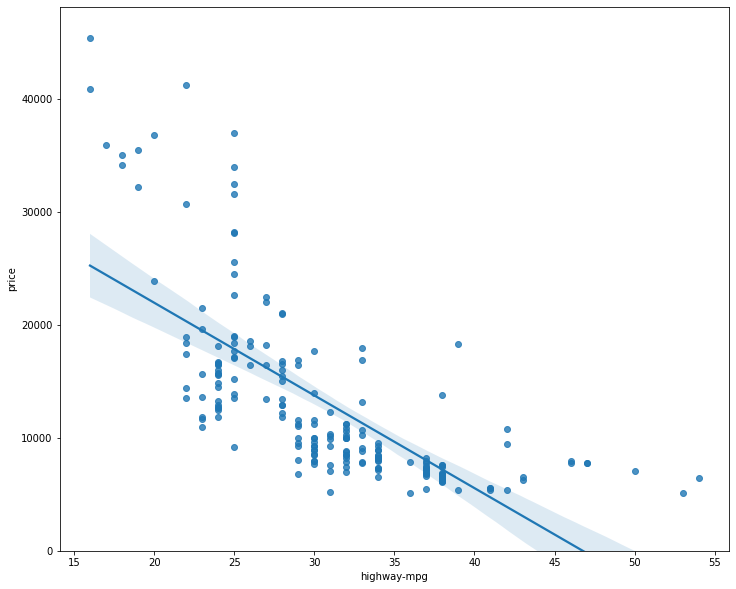

In [295]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Podemos ver en este gráfico que el precio está negativamente correlacionado con el mpg en carretera ya que la pendiente de regresión es negativa.

Una cosa a tener en cuenta al mirar un gráfico de regresión es prestar atención a cuán dispersos están los puntos de datos alrededor de la línea de regresión. Esto le dará una buena indicación de la variación de los datos y si un modelo lineal sería el mejor ajuste o no. Si los datos están demasiado alejados de la línea, este modelo lineal podría no ser el mejor modelo para estos datos.

Comparemos este gráfico con el gráfico de regresión de "peak-rpm".

(0.0, 47414.1)

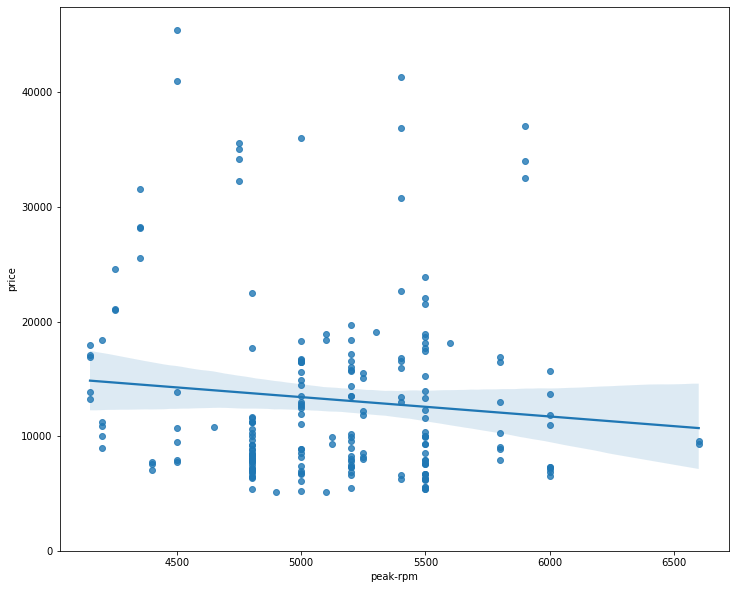

In [296]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Al comparar el gráfico de regresión de "peak-rpm" y "highway-mpg", vemos que los puntos para "highway-mpg" están mucho más cerca de la línea generada y, en promedio, disminuyen. Los puntos de "peak-rpm" están más dispersos alrededor de la línea predicha y es mucho más difícil determinar si los puntos disminuyen o aumentan a medida que aumenta el "peak-rpm".

### Gráfico  Residual

Una buena manera de visualizar la varianza de los datos es usar una gráfica de residuos.

¿Qué es un residual ?

La diferencia entre el valor observado (y) y el valor pronosticado (Yhat) se llama residual (e). Cuando observamos un gráfico de regresión, el residuo es la distancia desde el punto de datos hasta la línea de regresión ajustada.

Entonces, ¿qué es un gráfico residual ?

Una gráfica de residuos es un gráfico que muestra los residuos en el eje y vertical y la variable independiente en el eje x horizontal.

¿A qué prestamos atención cuando miramos una parcela residual?

Nos fijamos en la dispersión de los residuos:

- Si los puntos en una gráfica de residuos se distribuyen aleatoriamente alrededor del eje x , entonces un modelo lineal es apropiado para los datos.

¿Porqué es eso? La distribución aleatoria de residuos significa que la varianza es constante y, por lo tanto, el modelo lineal se ajusta bien a estos datos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


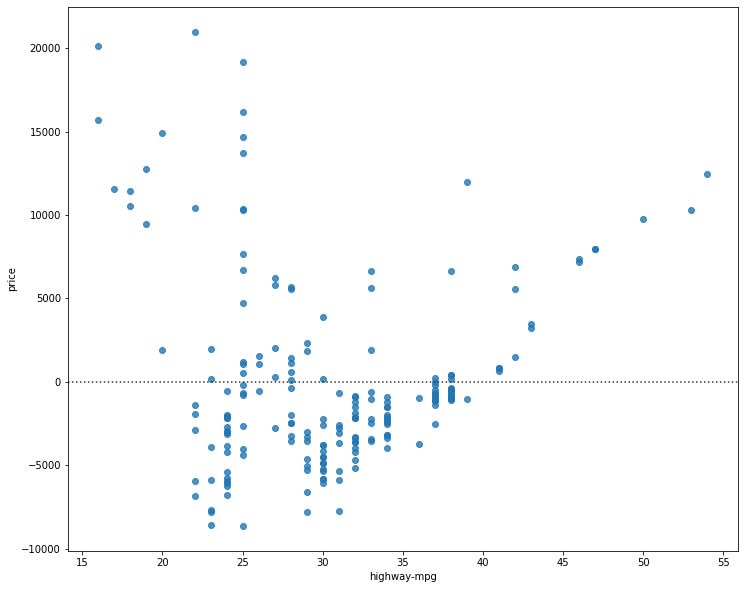

In [297]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

### ¿Qué nos dice esta trama?

Podemos ver en esta gráfica de residuos que los residuos no se distribuyen aleatoriamente alrededor del eje x, lo que nos lleva a creer que tal vez un modelo no lineal sea más apropiado para estos datos.

#### Regresión lineal múltiple
¿Cómo visualizamos un modelo de regresión lineal múltiple? Esto se vuelve un poco más complicado porque no se puede visualizar con regresión o gráfico residual.

Una forma de ver el ajuste del modelo es mirar el gráfico de distribución . Podemos observar la distribución de los valores ajustados que resultan del modelo y compararla con la distribución de los valores reales.

Primero, hagamos una predicción:

In [298]:
Y_hat = lm.predict(Z)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


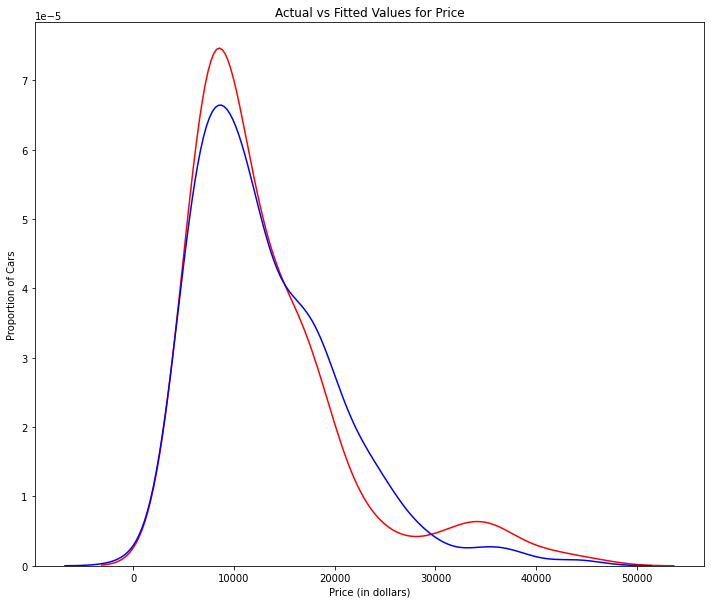

In [299]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Podemos ver que los valores ajustados están razonablemente cerca de los valores reales ya que las dos distribuciones se superponen un poco. Sin embargo, definitivamente hay algo de espacio para mejorar.

## 3. Regresión polinomial y canalizaciones
La regresión polinomial es un caso particular del modelo de regresión lineal general o de los modelos de regresión lineal múltiple.

Obtenemos relaciones no lineales elevando al cuadrado o estableciendo términos de orden superior de las variables predictoras.

Hay diferentes órdenes de regresión polinomial:

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


Vimos anteriormente que un modelo lineal no proporcionaba el mejor ajuste al utilizar "mpg en carretera" como variable de predicción. Veamos si podemos intentar ajustar un modelo polinomial a los datos.

Usaremos la siguiente función para graficar los datos:

In [300]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Obtengamos las variables:


In [301]:
x = df['highway-mpg']
y = df['price']

Ajustemos el polinomio usando la función polyfit , luego usemos la función poly1d para mostrar la función polinomial.

In [302]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Grafiquemos la función:

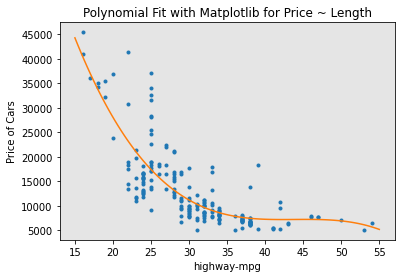

In [303]:
PlotPolly(p, x, y, 'highway-mpg')

In [304]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Ya podemos ver en el gráfico que este modelo polinomial funciona mejor que el modelo lineal. Esto se debe a que la función polinomial generada "golpea" más puntos de datos.

## Pregunta #4:
Cree un modelo polinomial de 11 órdenes con las variables x e y de arriba.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


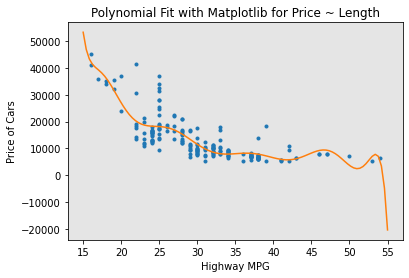

In [305]:
# Write your code below and press Shift+Enter to execute 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

La expresión analítica para la función polinomial multivariante se complica. Por ejemplo, la expresión de un polinomio de segundo orden (grado=2) con dos variables está dada por:

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


Podemos realizar una transformación polinomial en múltiples características. Primero, importamos el módulo:

In [306]:
from sklearn.preprocessing import PolynomialFeatures

Creamos un objeto PolynomialFeatures de grado 2:

In [307]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [308]:
Z_pr=pr.fit_transform(Z)

En los datos originales, hay 201 muestras y 4 funciones.

In [309]:
Z.shape

(201, 4)

Después de la transformación, hay 201 muestras y 15 funciones.

In [310]:
Z_pr.shape

(201, 15)

## Pipeline - Tubería

Las canalizaciones de datos simplifican los pasos para procesar los datos. Usamos el módulo Pipeline para crear un pipeline. También usamos StandardScaler como un paso en nuestra canalización.

In [311]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Creamos el pipeline creando una lista de tuplas incluyendo el nombre del modelo o estimador y su constructor correspondiente.

In [312]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Ingresamos la lista como un argumento para el constructor de la tubería:

In [313]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Primero, convertimos el tipo de datos Z al tipo flotante para evitar las advertencias de conversión que pueden aparecer como resultado de que StandardScaler tome entradas flotantes.

Luego, podemos normalizar los datos, realizar una transformación y ajustar el modelo simultáneamente.

In [314]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

SDe manera similar, podemos normalizar los datos, realizar una transformación y producir una predicción simultáneamente.

In [315]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Pregunta #5:
Cree una canalización que estandarice los datos, luego produzca una predicción usando un modelo de regresión lineal usando las características Z y el objetivo y.

In [316]:
# Write your code below and press Shift+Enter to execute 
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

#### 4. Medidas para la evaluación dentro de la muestra
Al evaluar nuestros modelos, no solo queremos visualizar los resultados, sino que también queremos una medida cuantitativa para determinar qué tan preciso es el modelo.

Dos medidas muy importantes que se utilizan a menudo en Estadística para determinar la precisión de un modelo son:

R^2 / R-cuadrado
Error cuadrático medio (MSE)
R-cuadrado

R cuadrado, también conocido como coeficiente de determinación, es una medida para indicar qué tan cerca están los datos de la línea de regresión ajustada.

El valor de la R-cuadrado es el porcentaje de variación de la variable de respuesta (y) que se explica mediante un modelo lineal.

Error cuadrático medio (MSE)

El error cuadrático medio mide el promedio de los cuadrados de los errores. Es decir, la diferencia entre el valor real (y) y el valor estimado (ŷ).

### Modelo 1: Regresión Lineal Simple
Calculemos el R^2:

In [317]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


Podemos decir que ~49.659% de la variación del precio se explica por este modelo lineal simple "horsepower_fit".

Calculemos el MSE:

Podemos predecir la salida, es decir, "yhat" usando el método de predicción, donde X es la variable de entrada:

In [318]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Importemos la función mean_squared_error de las métricas del módulo :

In [319]:
from sklearn.metrics import mean_squared_error

Podemos comparar los resultados previstos con los resultados reales:

In [320]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Modelo 2: Regresión Lineal Múltiple
Calculemos el R^2:

In [321]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Podemos decir que ~80.896 % de la variación del precio se explica por esta regresión lineal múltiple "multi_fit".

Calculemos el MSE.

Producimos una predicción:

In [322]:
Y_predict_multifit = lm.predict(Z)

Comparamos los resultados previstos con los resultados reales:


In [323]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Modelo 3: Ajuste polinomial
Calculemos el R^2.

Importemos la función r2_score de las métricas del módulo ya que estamos usando una función diferente.

In [324]:
from sklearn.metrics import r2_score

Aplicamos la función para obtener el valor de R^2:

In [325]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


Podemos decir que ~67.419 % de la variación del precio se explica por este ajuste polinomial.

### MSE
También podemos calcular el MSE:


In [326]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## 5. Predicción y Toma de Decisiones
### Predicción
En la sección anterior, entrenamos el modelo usando el método de ajuste . Ahora usaremos el método predict para producir una predicción. Permite importar pyplot para trazar; también usaremos algunas funciones de numpy.

In [327]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Crear una nueva entrada:

In [328]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model - Ajuste el Modelo


In [329]:
lm.fit(X, Y)
lm

LinearRegression()

Producir una predicción:

In [330]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

Podemos graficar los datos:

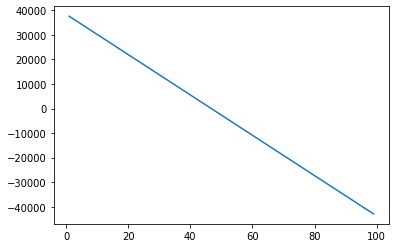

In [331]:
plt.plot(new_input, yhat)
plt.show()

### Toma de decisiones: determinación de un buen ajuste del modelo

Ahora que hemos visualizado los diferentes modelos y generado los valores R-cuadrado y MSE para los ajustes, ¿cómo determinamos un buen ajuste del modelo?

¿Cuál es un buen valor de R-cuadrado?
Al comparar modelos, el modelo con el valor R cuadrado más alto se ajusta mejor a los datos.

¿Qué es una buena MSE?
Al comparar modelos, el modelo con el valor MSE más pequeño se ajusta mejor a los datos.

Echemos un vistazo a los valores para los diferentes modelos.
Regresión lineal simple: uso de Highway-mpg como variable predictora del precio.

R-cuadrado: 0,49659118843391759
MSE: 3,16x10^7
Regresión lineal múltiple: uso de caballos de fuerza, peso en orden de marcha, tamaño del motor y mpg en carretera como variables predictoras del precio.

R-cuadrado: 0.80896354913783497
MSE: 1,2x10^7
Ajuste polinomial: Uso de Highway-mpg como variable predictora de precio.

R-cuadrado: 0,6741946663906514
MSE: 2,05 x 10^7

### Modelo de regresión lineal simple (SLR) frente a modelo de regresión lineal múltiple (MLR)

Por lo general, cuantas más variables tenga, mejor será su modelo para predecir, pero esto no siempre es cierto. En ocasiones, es posible que no tenga suficientes datos, que se encuentre con problemas numéricos o que muchas de las variables no sean útiles e incluso actúen como ruido. Como resultado, siempre debe verificar el MSE y el R^2.

Para comparar los resultados de los modelos MLR y SLR, observamos una combinación de R-squared y MSE para llegar a la mejor conclusión sobre el ajuste del modelo.

MSE : El MSE de SLR es 3.16x10^7 mientras que MLR tiene un MSE de 1.2 x10^7. El MSE de MLR es mucho más pequeño.
R-cuadrado : En este caso también podemos ver que hay una gran diferencia entre el R-cuadrado de la SLR y el R-cuadrado de la MLR. El R-cuadrado de la SLR (~0,497) es muy pequeño en comparación con el R-cuadrado de la MLR (~0,809).
Este R-cuadrado en combinación con el MSE muestra que MLR parece ser el mejor ajuste del modelo en este caso en comparación con SLR.

### Modelo lineal simple (SLR) frente a ajuste polinomial

MSE : Podemos ver que Polynomial Fit redujo el MSE, ya que este MSE es más pequeño que el de SLR.
R-cuadrado : El R-cuadrado para Polynomial Fit es más grande que el R-cuadrado para SLR, por lo que Polynomial Fit también aumentó bastante el R-cuadrado.
Dado que el ajuste polinomial resultó en un MSE más bajo y un R-cuadrado más alto, podemos concluir que este fue un modelo de mejor ajuste que la regresión lineal simple para predecir el "precio" con "mpg en carretera" como variable de predicción.

### Regresión lineal múltiple (MLR) frente a ajuste polinomial

MSE : El MSE para MLR es más pequeño que el MSE para Polynomial Fit.
R-cuadrado : El R-cuadrado para el MLR también es mucho mayor que para el Ajuste polinomial.

### Conclusión

Comparando estos tres modelos, concluimos que el modelo MLR es el mejor modelo para poder predecir el precio a partir de nuestro conjunto de datos. Este resultado tiene sentido ya que tenemos 27 variables en total y sabemos que más de una de esas variables son predictores potenciales del precio final del automóvil.